https://www.kaggle.com/code/ahmedelsany/diameter-prediction-of-asteroids-acc-97

https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data


# Librerias Importadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

Comenzamos importando las bibliotecas esenciales que necesitaremos para nuestro análisis. numpy y pandas se usarán para manejar los datos, mientras que matplotlib se usará para realizar las visualizaciones. Las bibliotecas de sklearn se utilizan para tareas de machine learning, como dividir los datos, entrenar el modelo y evaluar los resultados.

# Análisis Exploratorio de Datos (EDA)

# Nueva sección

In [ ]:
ast = pd.read_csv('dataset.csv')

In [ ]:
ast.head(7).T

,0,1,2,3,4,5,6
id,a0000001,a0000002,a0000003,a0000004,a0000005,a0000006,a0000007
spkid,2000001,2000002,2000003,2000004,2000005,2000006,2000007
full_name,1 Ceres,2 Pallas,3 Juno,4 Vesta,5 Astraea,6 Hebe,7 Iris
pdes,1,2,3,4,5,6,7
name,Ceres,Pallas,Juno,Vesta,Astraea,Hebe,Iris
prefix,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neo,N,N,N,N,N,N,N
pha,N,N,N,N,N,N,N
H,3.4,4.2,5.33,3.0,6.9,5.8,5.6
diameter,939.4,545.0,246.596,525.4,106.699,185.18,199.83


In [ ]:
ast.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [ ]:
print(ast.columns)

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')


In [ ]:
rename_column = {
    'id': 'ID',
    'spkid': 'SPK_ID',
    'full_name': 'Full_Name',
    'pdes': 'Primary_Designation',
    'name': 'IAU_Name',
    'prefix': 'Prefix',
    'neo': 'Near_Earth_Object',
    'pha': 'Potentially_Hazardous_Asteroid',
    'H': 'Absolute_Magnitude',
    'diameter': 'Diameter_km',
    'albedo': 'Geometric_Albedo',
    'diameter_sigma': 'Diameter_Uncertainty',
    'orbit_id': 'Orbit_Solution_ID',
    'epoch': 'Epoch',
    'epoch_mjd': 'Epoch_MJD',
    'epoch_cal': 'Epoch_Calendar',
    'equinox': 'Equinox',
    'e': 'Eccentricity',
    'a': 'Semi_Major_Axis_au',
    'q': 'Perihelion_Distance_au',
    'i': 'Inclination_deg',
    'om': 'Longitude_Ascending_Node',
    'w': 'Argument_of_Perihelion',
    'ma': 'Mean_Anomaly',
    'ad': 'Aphelion_Distance_au',
    'n': 'Mean_Motion',
    'tp': 'Time_of_Perihelion_Passage',
    'tp_cal': 'Time_of_Perihelion_Calendar',
    'per': 'Orbital_Period_days',
    'per_y': 'Orbital_Period_years',
    'moid': 'Minimum_Orbit_Intersection_Distance',
    'moid_ld': 'Minimum_Orbit_Intersection_Distance_LD',
    'sigma_e': 'Eccentricity_Uncertainty',
    'sigma_a': 'Semi_Major_Axis_Uncertainty',
    'sigma_q': 'Perihelion_Distance_Uncertainty',
    'sigma_i': 'Inclination_Uncertainty',
    'sigma_om': 'Longitude_Ascending_Node_Uncertainty',
    'sigma_w': 'Argument_of_Perihelion_Uncertainty',
    'sigma_ma': 'Mean_Anomaly_Uncertainty',
    'sigma_ad': 'Aphelion_Distance_Uncertainty',
    'sigma_n': 'Mean_Motion_Uncertainty',
    'sigma_tp': 'Time_of_Perihelion_Passage_Uncertainty',
    'sigma_per': 'Orbital_Period_Uncertainty',
    'class': 'Class',
    'rms': 'RMS_Error'
}

ast = ast.rename(columns=rename_column)

ast.columns

Index(['ID', 'SPK_ID', 'Full_Name', 'Primary_Designation', 'IAU_Name',
       'Prefix', 'Near_Earth_Object', 'Potentially_Hazardous_Asteroid',
       'Absolute_Magnitude', 'Diameter_km', 'Geometric_Albedo',
       'Diameter_Uncertainty', 'Orbit_Solution_ID', 'Epoch', 'Epoch_MJD',
       'Epoch_Calendar', 'Equinox', 'Eccentricity', 'Semi_Major_Axis_au',
       'Perihelion_Distance_au', 'Inclination_deg', 'Longitude_Ascending_Node',
       'Argument_of_Perihelion', 'Mean_Anomaly', 'Aphelion_Distance_au',
       'Mean_Motion', 'Time_of_Perihelion_Passage',
       'Time_of_Perihelion_Calendar', 'Orbital_Period_days',
       'Orbital_Period_years', 'Minimum_Orbit_Intersection_Distance',
       'Minimum_Orbit_Intersection_Distance_LD', 'Eccentricity_Uncertainty',
       'Semi_Major_Axis_Uncertainty', 'Perihelion_Distance_Uncertainty',
       'Inclination_Uncertainty', 'Longitude_Ascending_Node_Uncertainty',
       'Argument_of_Perihelion_Uncertainty', 'Mean_Anomaly_Uncertainty',
       'Aphe

In [ ]:
trad = {
    'id': 'ID',
    'spkid': 'SPK_ID',
    'Full_Name': 'Nombre_Completo',
    'Primary_Designation': 'Des_prim',
    'IAU_Name': 'Nombre_IAU',  # Esto ya está correcto, no es necesario renombrarlo
    'prefix': 'Prefijo',
    'Near_Earth_Object': 'Objeto_Cercano_a_Tierra',  # Esto también ya está correcto
    'Potentially_Hazardous_Asteroid': 'Asteroide_Potencialmente_Peligroso',
    'Absolute_Magnitude': 'Magnitud_Absoluta',
    'Diameter_km': 'Diametro_km',
    'Geometric_Albedo': 'Albedo_Geometrico',
    'Diameter_Uncertainty': 'Incertidumbre_Diametro',
    'Orbit_Solution_ID': 'ID_Solucion_Orbital',
    'Epoch': 'Epoca',
    'Epoch_MJD': 'Epoca_MJD',
    'Epoch_Calendar': 'Epoca_Calendario',
    'Equinox': 'Equinoccio',
    'Eccentricity': 'Excentricidad',
    'Semi_Major_Axis_au': 'Eje_Semi_Mayor_au',
    'Perihelion_Distance_au': 'Distancia_perihelio_au',
    'Inclination_deg': 'Inclinacion_deg',
    'Longitude_Ascending_Node': 'Longitud_Nodo_Ascedente',
    'Argument_of_Perihelion': 'Argumento_de_Perihelio',
    'Mean_Anomaly': 'Anomalia_Media',
    'Aphelion_Distance_au': 'Distancia_afelio_au',
    'Mean_Motion': 'Movimiento_Medio',
    'Time_of_Perihelion_Passage': 'Tiempo_Paso_Perihelio',
    'Time_of_Perihelion_Calendar': 'Tiempo_Paso_Perihelio_Calendario',
    'Orbital_Period_days': 'Periodo_Orbital_dias',
    'Orbital_Period_years': 'Periodo_Orbital_anos',
    'Minimum_Orbit_Intersection_Distance': 'Distancia_Minima_Interseccion_Orbital',
    'Minimum_Orbit_Intersection_Distance_LD': 'Distancia_Minima_Interseccion_Orbital_LD',
    'Eccentricity_Uncertainty': 'Incertidumbre_Excentricidad',
    'Semi_Major_Axis_Uncertainty': 'Incertidumbre_Eje_Semi_Mayor',
    'Perihelion_Distance_Uncertainty': 'Incertidumbre_Distancia_perihelio',
    'Inclination_Uncertainty': 'Incertidumbre_Inclinacion',
    'Longitude_Ascending_Node_Uncertainty': 'Incertidumbre_Longitud_Nodo_Ascedente',
    'Argument_of_Perihelion_Uncertainty': 'Incertidumbre_Argumento_de_Perihelio',
    'Mean_Anomaly_Uncertainty': 'Incertidumbre_Anomalia_Media',
    'Aphelion_Distance_Uncertainty': 'Incertidumbre_Distancia_afelio',
    'Mean_Motion_Uncertainty': 'Incertidumbre_Movimiento_Medio',
    'Time_of_Perihelion_Passage_Uncertainty': 'Incertidumbre_Tiempo_Paso_Perihelio',
    'Orbital_Period_Uncertainty': 'Incertidumbre_Periodo_Orbital',
    'Class': 'Clase',
    'RMS_Error': 'Error_RMS'
}


In [ ]:
ast = ast.rename(columns = trad)
ast.columns

Index(['ID', 'SPK_ID', 'Nombre_Completo', 'Des_prim', 'Nombre_IAU', 'Prefix',
       'Objeto_Cercano_a_Tierra', 'Asteroide_Potencialmente_Peligroso',
       'Magnitud_Absoluta', 'Diametro_km', 'Albedo_Geometrico',
       'Incertidumbre_Diametro', 'ID_Solucion_Orbital', 'Epoca', 'Epoca_MJD',
       'Epoca_Calendario', 'Equinoccio', 'Excentricidad', 'Eje_Semi_Mayor_au',
       'Distancia_perihelio_au', 'Inclinacion_deg', 'Longitud_Nodo_Ascedente',
       'Argumento_de_Perihelio', 'Anomalia_Media', 'Distancia_afelio_au',
       'Movimiento_Medio', 'Tiempo_Paso_Perihelio',
       'Tiempo_Paso_Perihelio_Calendario', 'Periodo_Orbital_dias',
       'Periodo_Orbital_anos', 'Distancia_Minima_Interseccion_Orbital',
       'Distancia_Minima_Interseccion_Orbital_LD',
       'Incertidumbre_Excentricidad', 'Incertidumbre_Eje_Semi_Mayor',
       'Incertidumbre_Distancia_perihelio', 'Incertidumbre_Inclinacion',
       'Incertidumbre_Longitud_Nodo_Ascedente',
       'Incertidumbre_Argumento_de_Periheli

In [ ]:
ast.Clase.value_counts().T

,count
Clase,
MBA,855954
OMB,28355
IMB,20360
MCA,18685
APO,12687
AMO,8457
TJN,8221
TNO,3468
ATE,1729


In [ ]:
ast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   ID                                        958524 non-null  object 
 1   SPK_ID                                    958524 non-null  int64  
 2   Nombre_Completo                           958524 non-null  object 
 3   Des_prim                                  958524 non-null  object 
 4   Nombre_IAU                                22064 non-null   object 
 5   Prefix                                    18 non-null      object 
 6   Objeto_Cercano_a_Tierra                   958520 non-null  object 
 7   Asteroide_Potencialmente_Peligroso        938603 non-null  object 
 8   Magnitud_Absoluta                         952261 non-null  float64
 9   Diametro_km                               136209 non-null  float64
 10  Albedo_Geometrico   

In [ ]:
ast.shape

(958524, 45)

In [ ]:
cols_to_drop = [
    'ID',
    'SPK_ID',
    'Nombre_Completo',
    'Des_prim',
    'ID_Solucion_Orbital',
    'Epoca_Calendario',
    'Tiempo_Paso_Perihelio_Calendario',
    'Epoca_MJD',
    'Equinoccio'
]

ast = ast.drop(columns=cols_to_drop)
print("Columnas usadas para el análisis:")
ast.columns

Columnas usadas para el análisis:


Index(['Nombre_IAU', 'Prefix', 'Objeto_Cercano_a_Tierra',
       'Asteroide_Potencialmente_Peligroso', 'Magnitud_Absoluta',
       'Diametro_km', 'Albedo_Geometrico', 'Incertidumbre_Diametro', 'Epoca',
       'Excentricidad', 'Eje_Semi_Mayor_au', 'Distancia_perihelio_au',
       'Inclinacion_deg', 'Longitud_Nodo_Ascedente', 'Argumento_de_Perihelio',
       'Anomalia_Media', 'Distancia_afelio_au', 'Movimiento_Medio',
       'Tiempo_Paso_Perihelio', 'Periodo_Orbital_dias', 'Periodo_Orbital_anos',
       'Distancia_Minima_Interseccion_Orbital',
       'Distancia_Minima_Interseccion_Orbital_LD',
       'Incertidumbre_Excentricidad', 'Incertidumbre_Eje_Semi_Mayor',
       'Incertidumbre_Distancia_perihelio', 'Incertidumbre_Inclinacion',
       'Incertidumbre_Longitud_Nodo_Ascedente',
       'Incertidumbre_Argumento_de_Perihelio', 'Incertidumbre_Anomalia_Media',
       'Incertidumbre_Distancia_afelio', 'Incertidumbre_Movimiento_Medio',
       'Incertidumbre_Tiempo_Paso_Perihelio', 'Incertidu

In [ ]:
ast.shape

(958524, 36)

In [ ]:
ast.isna().sum()

,0
Nombre_IAU,936460
Prefix,958506
Objeto_Cercano_a_Tierra,4
Asteroide_Potencialmente_Peligroso,19921
Magnitud_Absoluta,6263
Diametro_km,822315
Albedo_Geometrico,823421
Incertidumbre_Diametro,822443
Epoca,0
Excentricidad,0


ast.isna(): Esta función retorna un DataFrame del mismo tamaño que ast, donde cada celda es True si el valor en esa celda es NaN o False si no lo es.

sum(): Después, la función sum() cuenta cuántos valores True (es decir, cuántos valores NaN) hay por columna. El resultado es una serie que muestra el número de valores NaN por cada columna del dataframe .

In [ ]:
print(f"Número de filas antes de eliminar el objetivo nulo: {len(ast)}")

Número de filas antes de eliminar el objetivo nulo: 958524


In [ ]:


ast = ast.dropna(subset=['Diametro_km'])

print(f"Número de filas después de eliminar el objetivo nulo: {len(ast)}")

ast['Diametro_km'].isnull().sum()

Número de filas después de eliminar el objetivo nulo: 136209


np.int64(0)

In [ ]:
ast.isna().sum()

,0
Nombre_IAU,121047
Prefix,136209
Objeto_Cercano_a_Tierra,0
Asteroide_Potencialmente_Peligroso,0
Magnitud_Absoluta,4164
Diametro_km,0
Albedo_Geometrico,1109
Incertidumbre_Diametro,128
Epoca,0
Excentricidad,0


In [ ]:
ast.Epoca.value_counts().T

,count
Epoca,
2459000.5,131828
2455357.5,43
2455414.5,43
2455361.5,39
2455363.5,39
...,...
2456363.5,1
2456890.5,1
2456960.5,1


In [ ]:
import pandas as pd

missing_counts = ast.isnull().sum()

missing_percentage = (missing_counts / len(ast)) * 100

missing_info = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentage.round(2)
})

print(missing_info)

                                          Missing_Count  Missing_Percentage
Nombre_IAU                                       121047               88.87
Prefix                                           136209              100.00
Objeto_Cercano_a_Tierra                               0                0.00
Asteroide_Potencialmente_Peligroso                    0                0.00
Magnitud_Absoluta                                  4164                3.06
Diametro_km                                           0                0.00
Albedo_Geometrico                                  1109                0.81
Incertidumbre_Diametro                              128                0.09
Epoca                                                 0                0.00
Excentricidad                                         0                0.00
Eje_Semi_Mayor_au                                     0                0.00
Distancia_perihelio_au                                0                0.00
Inclinacion_

In [ ]:
ast.shape

(136209, 36)

In [ ]:
ast.columns

Index(['Nombre_IAU', 'Prefix', 'Objeto_Cercano_a_Tierra',
       'Asteroide_Potencialmente_Peligroso', 'Magnitud_Absoluta',
       'Diametro_km', 'Albedo_Geometrico', 'Incertidumbre_Diametro', 'Epoca',
       'Excentricidad', 'Eje_Semi_Mayor_au', 'Distancia_perihelio_au',
       'Inclinacion_deg', 'Longitud_Nodo_Ascedente', 'Argumento_de_Perihelio',
       'Anomalia_Media', 'Distancia_afelio_au', 'Movimiento_Medio',
       'Tiempo_Paso_Perihelio', 'Periodo_Orbital_dias', 'Periodo_Orbital_anos',
       'Distancia_Minima_Interseccion_Orbital',
       'Distancia_Minima_Interseccion_Orbital_LD',
       'Incertidumbre_Excentricidad', 'Incertidumbre_Eje_Semi_Mayor',
       'Incertidumbre_Distancia_perihelio', 'Incertidumbre_Inclinacion',
       'Incertidumbre_Longitud_Nodo_Ascedente',
       'Incertidumbre_Argumento_de_Perihelio', 'Incertidumbre_Anomalia_Media',
       'Incertidumbre_Distancia_afelio', 'Incertidumbre_Movimiento_Medio',
       'Incertidumbre_Tiempo_Paso_Perihelio', 'Incertidu

In [ ]:
ast.drop(columns=["Nombre_IAU","Prefix","Epoca"],inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer

num_cols = ast.select_dtypes(include=['float64', 'int64']).columns
imputer_median = SimpleImputer(strategy='median')
ast[num_cols] = imputer_median.fit_transform(ast[num_cols])

cat_cols = ast.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    mode_val = ast[col].mode()[0]
    ast[col].fillna(mode_val, inplace=True)

print("Number of missing values after imputation:")
ast.isnull().sum()

Number of missing values after imputation:


,0
Objeto_Cercano_a_Tierra,0
Asteroide_Potencialmente_Peligroso,0
Magnitud_Absoluta,0
Diametro_km,0
Albedo_Geometrico,0
Incertidumbre_Diametro,0
Excentricidad,0
Eje_Semi_Mayor_au,0
Distancia_perihelio_au,0
Inclinacion_deg,0


In [ ]:
ast.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
891841,False
891971,False
894103,False
901055,False


In [ ]:
ast.describe()

,Magnitud_Absoluta,Diametro_km,Albedo_Geometrico,Incertidumbre_Diametro,Excentricidad,Eje_Semi_Mayor_au,Distancia_perihelio_au,Inclinacion_deg,Longitud_Nodo_Ascedente,Argumento_de_Perihelio,...,Incertidumbre_Distancia_perihelio,Incertidumbre_Inclinacion,Incertidumbre_Longitud_Nodo_Ascedente,Incertidumbre_Argumento_de_Perihelio,Incertidumbre_Anomalia_Media,Incertidumbre_Distancia_afelio,Incertidumbre_Movimiento_Medio,Incertidumbre_Tiempo_Paso_Perihelio,Incertidumbre_Periodo_Orbital,Error_RMS
count,136209.000000,136209.000000,136209.000000,136209.000000,136209.000000,136209.000000,136209.000000,136209.000000,136209.000000,136209.000000,...,1.362090e+05,1.362090e+05,1.362090e+05,1.362090e+05,1.362090e+05,1.362090e+05,1.362090e+05,1.362090e+05,1.362090e+05,136209.000000
mean,15.134388,5.506429,0.130205,0.479046,0.145660,2.819158,2.406130,10.295360,169.729893,181.808169,...,8.118465e-01,8.868558e-01,5.920957e+00,1.734360e+02,1.734253e+02,9.972685e-01,1.261936e-01,6.411608e+02,7.786280e+02,0.544153
std,1.366614,9.425164,0.109971,0.782540,0.077464,1.495980,0.516931,6.812632,102.715175,103.516287,...,1.240535e+01,1.491657e+01,7.413186e+01,5.292815e+03,5.300015e+03,1.306433e+01,1.563182e+00,2.066770e+04,1.033515e+04,0.073617
min,3.000000,0.002500,0.001000,0.000500,0.000060,0.626210,0.081820,0.022056,0.000418,0.000130,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.054414
25%,14.400000,2.780000,0.053000,0.180000,0.089878,2.542856,2.072478,5.088142,82.276476,91.903488,...,1.099100e-07,4.594000e-06,2.285000e-05,3.492800e-05,1.663200e-05,1.538800e-08,1.734500e-09,7.350000e-05,1.184200e-05,0.508920
50%,15.200000,3.972000,0.079000,0.332000,0.138919,2.754950,2.368605,9.335690,160.301343,183.509496,...,1.434200e-07,5.684200e-06,3.543700e-05,5.232600e-05,2.493200e-05,2.395700e-08,2.299300e-09,1.189100e-04,1.952100e-05,0.544180
75%,16.000000,5.765000,0.188000,0.620000,0.191174,3.095029,2.688275,13.670331,255.961202,271.642281,...,2.018700e-07,7.568200e-06,6.553100e-05,8.927900e-05,4.368900e-05,3.974500e-08,3.428300e-09,2.226600e-04,3.336700e-05,0.579260
max,29.900000,939.400000,1.000000,140.000000,0.983789,376.133297,40.318477,170.334595,359.999793,359.998075,...,1.713600e+03,1.614600e+03,5.894300e+03,1.237800e+06,1.234600e+06,1.398900e+03,1.312600e+02,4.222500e+06,1.034600e+06,7.725100


In [ ]:
def handle_outliers_iqr(ast, columns=None, method='remove'):

    ast_out = ast.copy()

    if columns is None:
        columns = ast_out.select_dtypes(include=['number']).columns.tolist()

    for col in columns:
        Q1 = ast_out[col].quantile(0.25)
        Q3 = ast_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            ast_out = ast_out[(ast_out[col] >= lower_bound) & (ast_out[col] <= upper_bound)]

        elif method == 'cap':
            ast_out[col] = ast_out[col].clip(lower=lower_bound, upper=upper_bound)

        else:
            raise ValueError("method must be either 'remove' or 'cap'")

    return ast_out

In [ ]:
ast_cleaned = handle_outliers_iqr(ast, method='cap')
print(f"Rows before: {len(ast)}, Rows after removing outliers: {len(ast_cleaned)}")

Rows before: 136209, Rows after removing outliers: 136209


In [ ]:
ast.shape

(136209, 33)

In [ ]:
ast_cleaned.shape

(136209, 33)

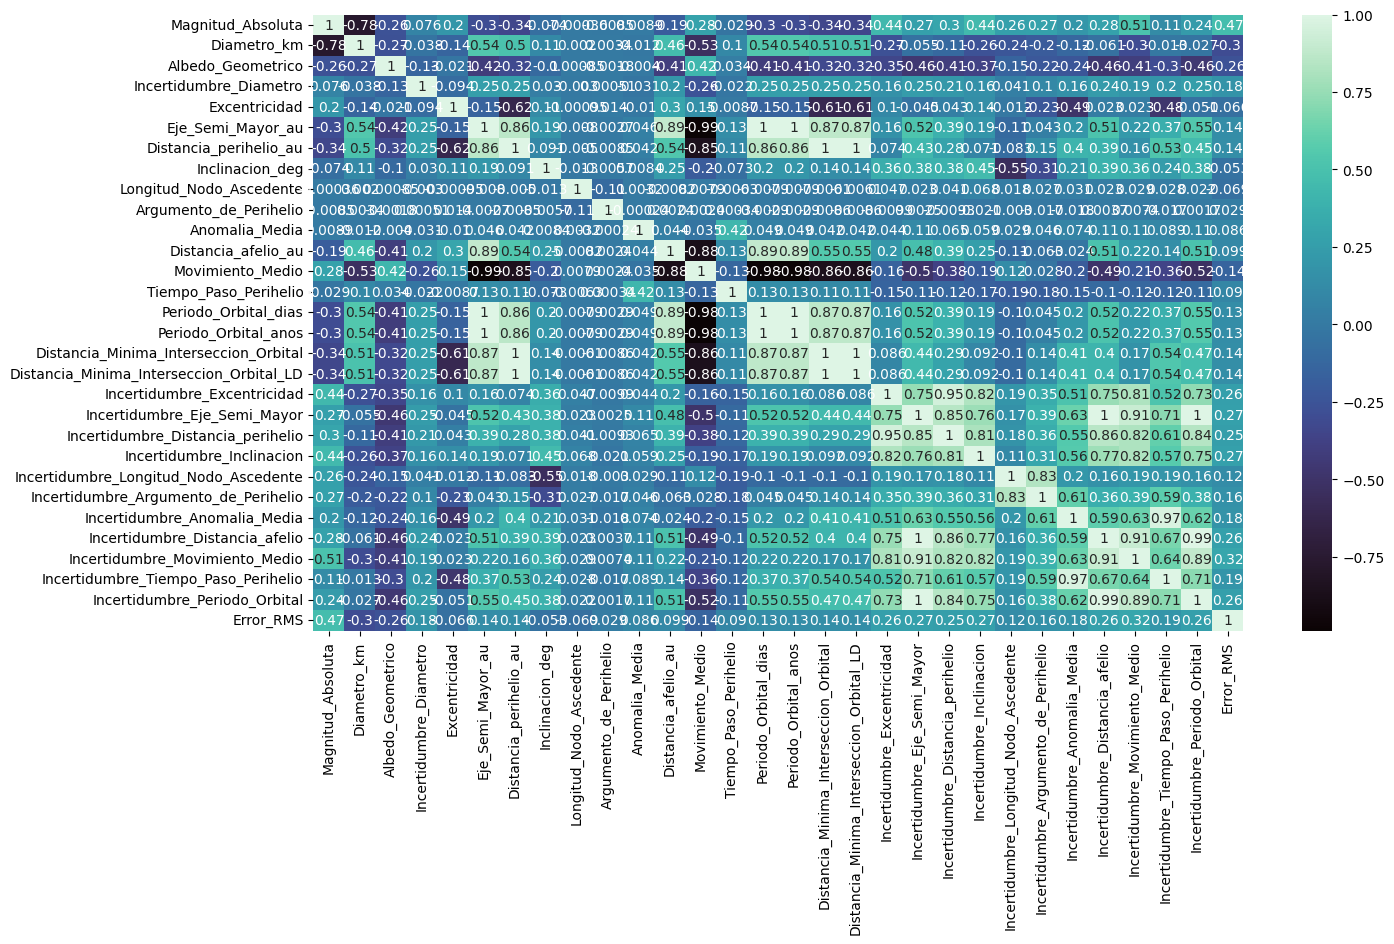

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(ast_cleaned[num_cols].corr(),cmap='mako',annot=True)
plt.show()

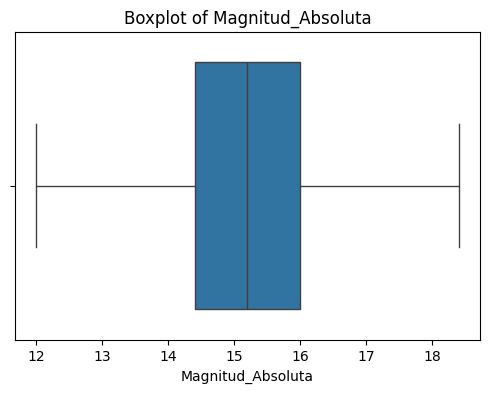

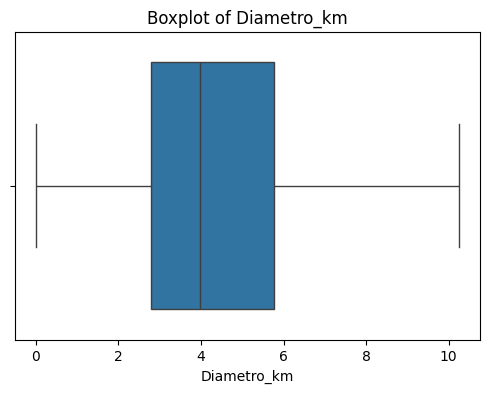

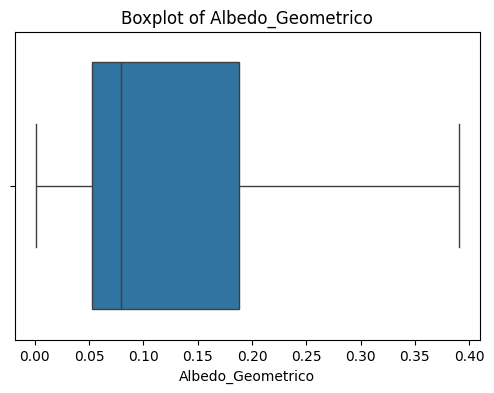

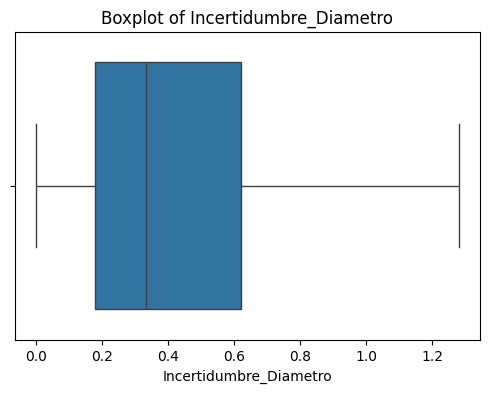

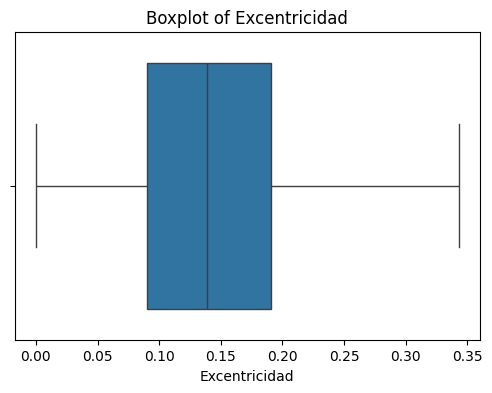

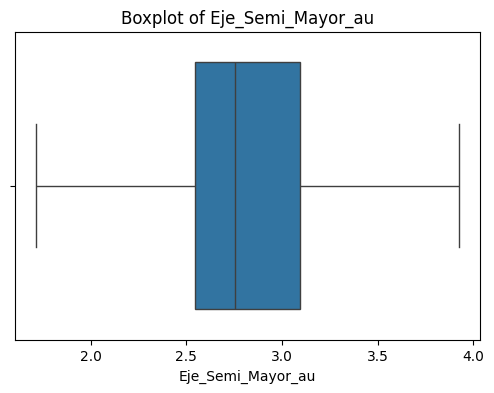

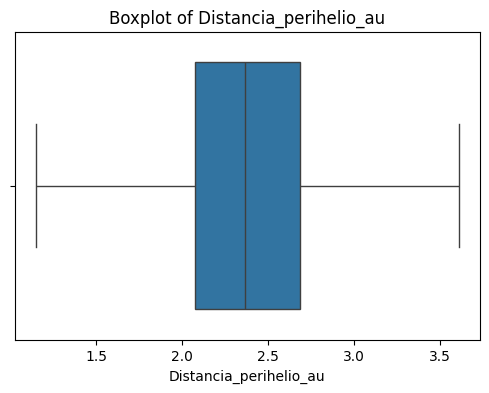

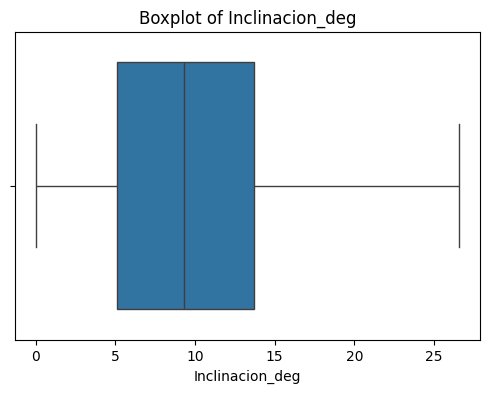

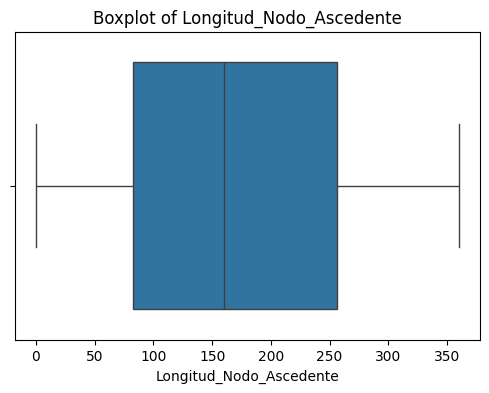

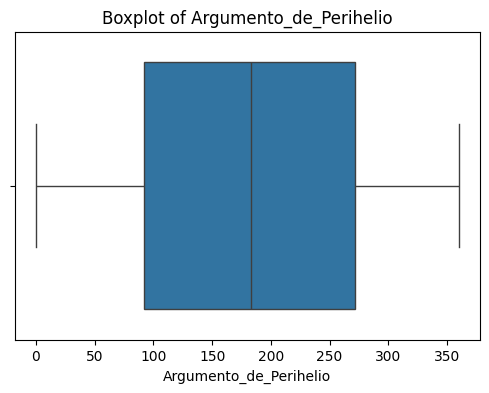

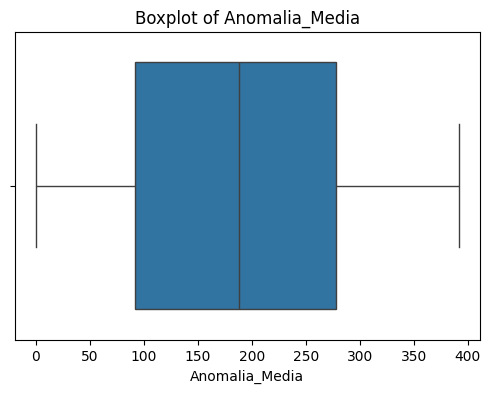

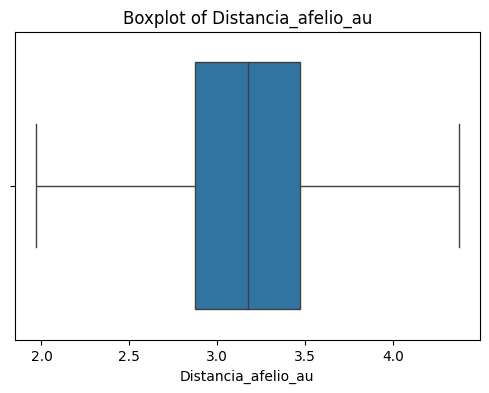

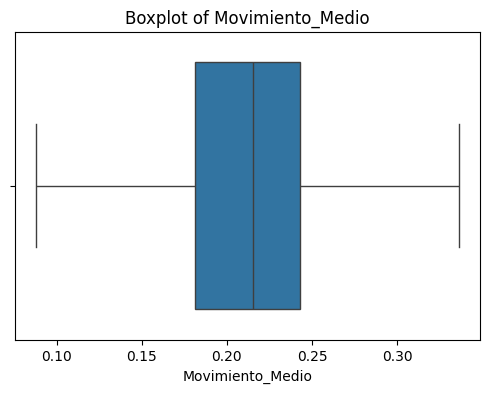

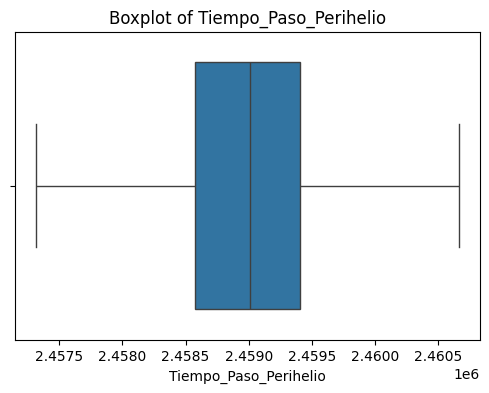

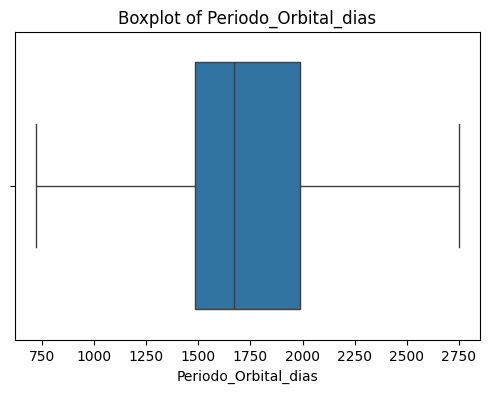

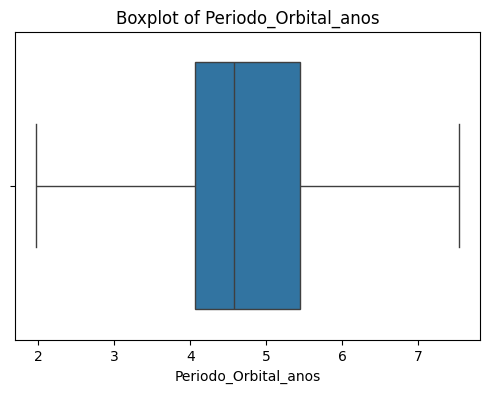

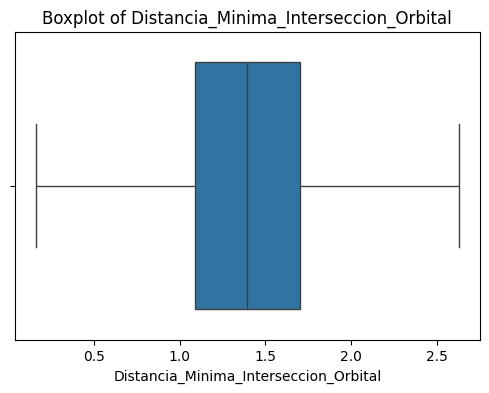

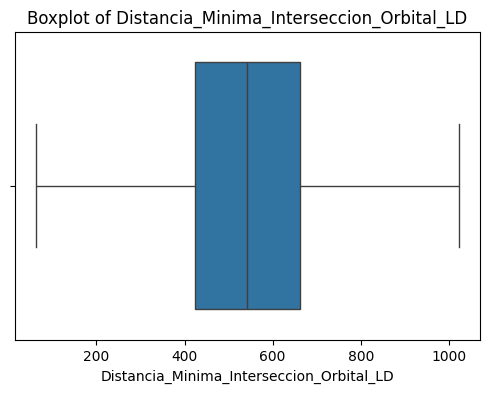

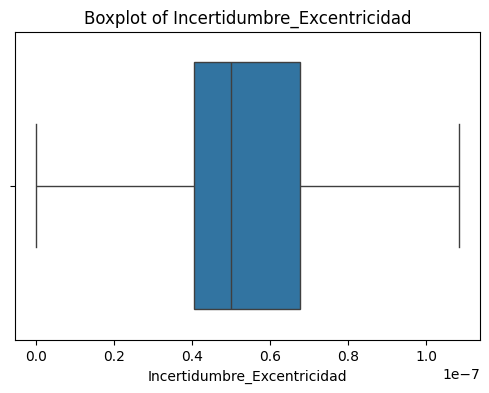

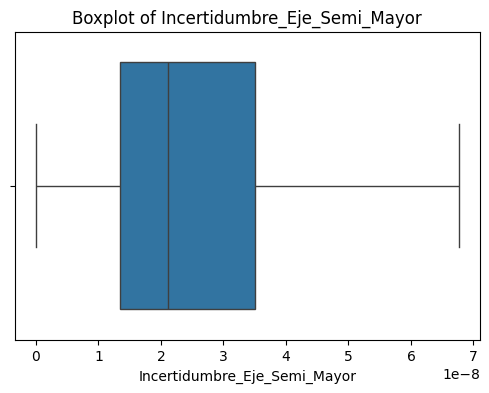

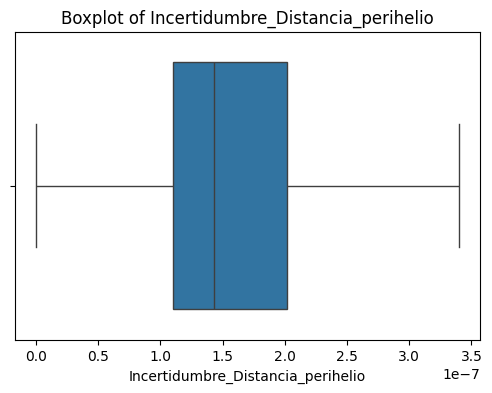

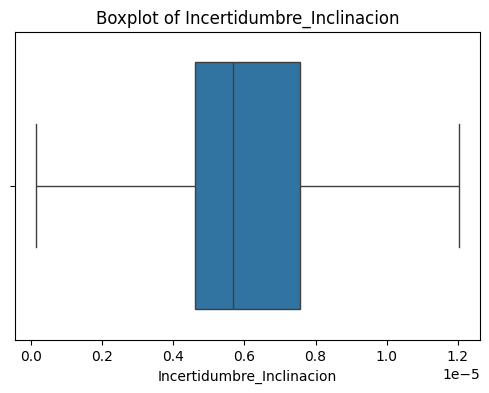

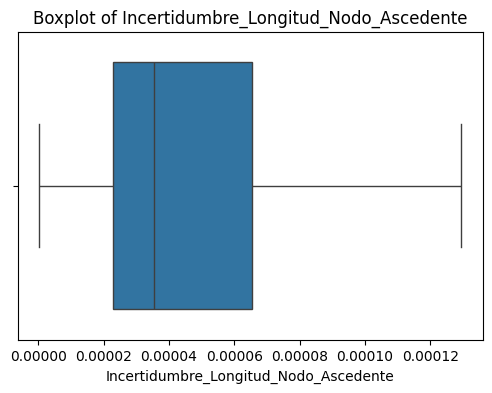

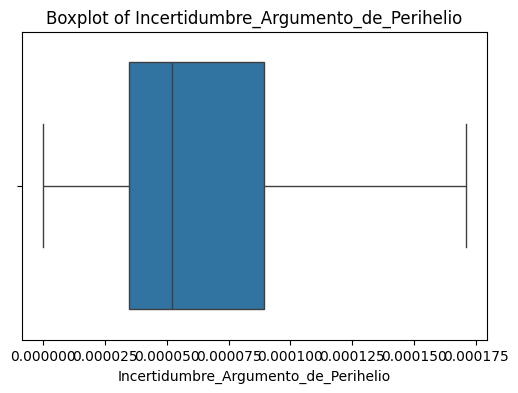

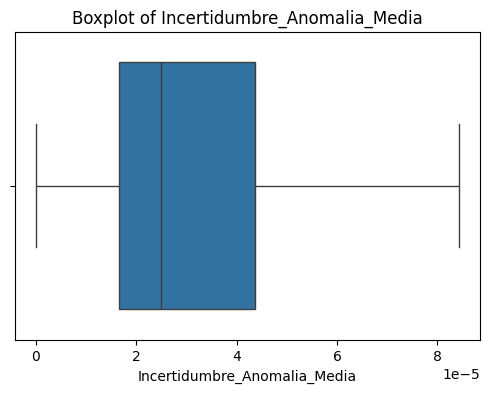

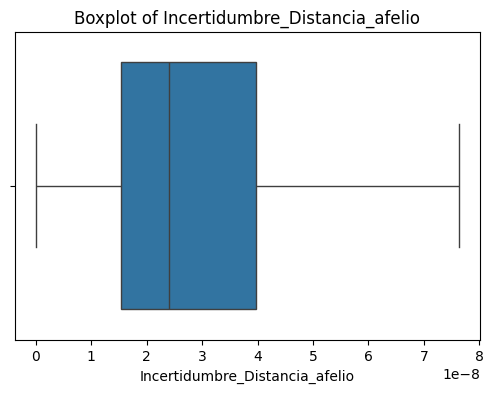

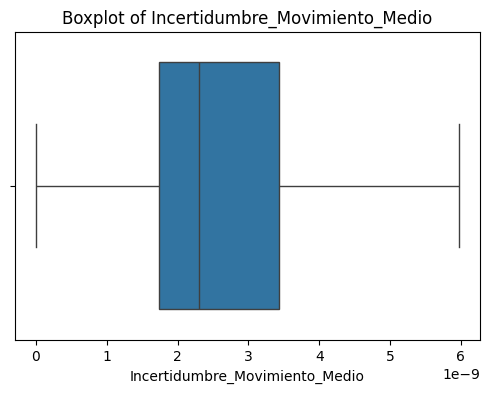

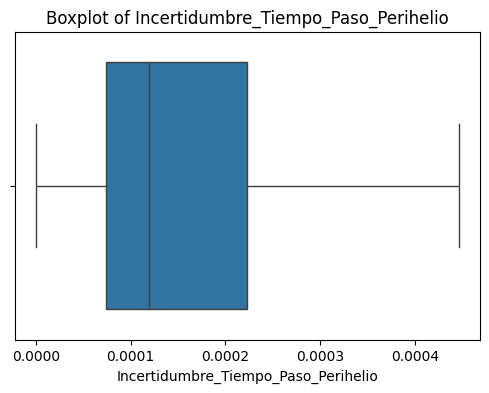

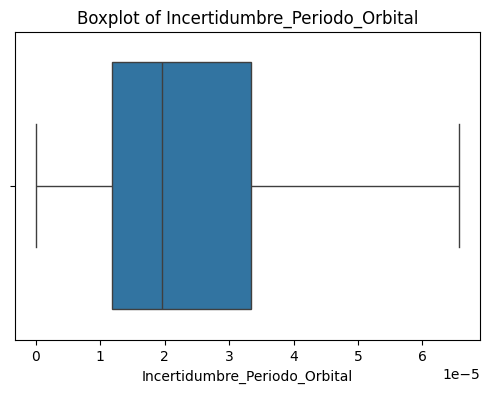

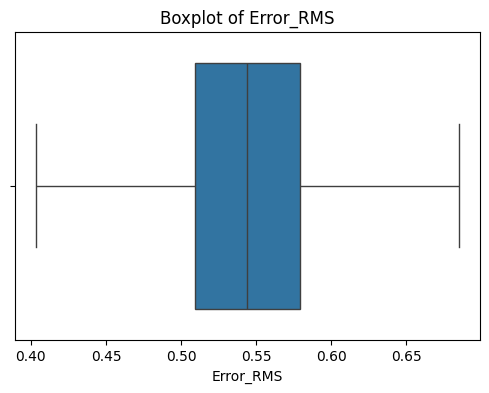

In [ ]:
numeric_cols = ast_cleaned.select_dtypes(include=['number']).columns

for col in numeric_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=ast_cleaned[col])
  plt.title(f'Boxplot of {col}')
  plt.show

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
object_columns = ast_cleaned.select_dtypes(include='object').columns
for col in object_columns:
    ast_cleaned[col] = le.fit_transform(ast_cleaned[col])

# df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

ast_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136209 entries, 0 to 909489
Data columns (total 33 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Objeto_Cercano_a_Tierra                   136209 non-null  int64  
 1   Asteroide_Potencialmente_Peligroso        136209 non-null  int64  
 2   Magnitud_Absoluta                         136209 non-null  float64
 3   Diametro_km                               136209 non-null  float64
 4   Albedo_Geometrico                         136209 non-null  float64
 5   Incertidumbre_Diametro                    136209 non-null  float64
 6   Excentricidad                             136209 non-null  float64
 7   Eje_Semi_Mayor_au                         136209 non-null  float64
 8   Distancia_perihelio_au                    136209 non-null  float64
 9   Inclinacion_deg                           136209 non-null  float64
 10  Longitud_Nodo_Ascedente  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Separar X e y
X = ast_cleaned.drop('Diametro_km', axis=1)
y = ast_cleaned['Diametro_km']

# Entrenar un RF ligero solo para feature importance
rf = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

# Importancias
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

importances


,0
Magnitud_Absoluta,0.644081
Albedo_Geometrico,0.223809
Movimiento_Medio,0.055703
Eje_Semi_Mayor_au,0.013646
Periodo_Orbital_anos,0.011169
Tiempo_Paso_Perihelio,0.010164
Periodo_Orbital_dias,0.009324
Incertidumbre_Diametro,0.003789
Anomalia_Media,0.002103
Distancia_perihelio_au,0.001983


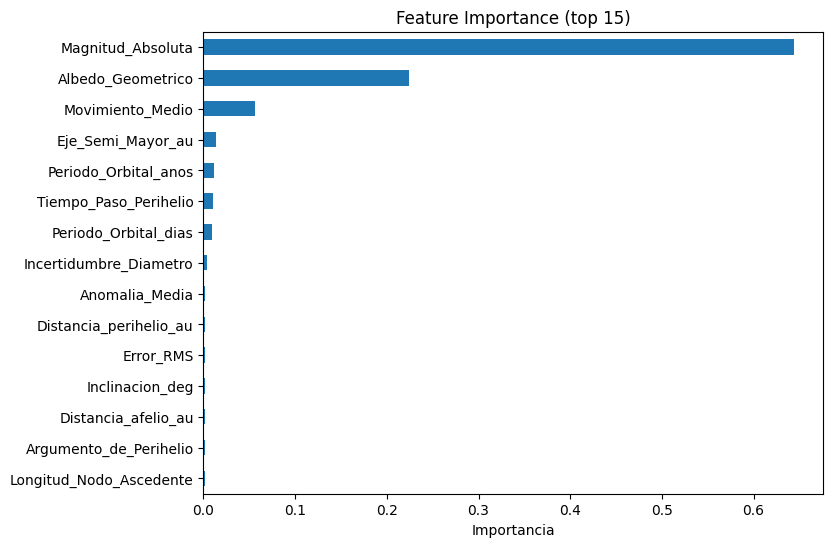

In [ ]:
importances.head(15).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (top 15)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top_features = [
    'Magnitud_Absoluta',
    'Albedo_Geometrico',
    'Movimiento_Medio',
    'Eje_Semi_Mayor_au',
    'Periodo_Orbital_anos',
    'Tiempo_Paso_Perihelio',
    'Periodo_Orbital_dias',
]

ast_top7 = ast_cleaned[top_features + ['Diametro_km']]
ast_top7.info()


<class 'pandas.core.frame.DataFrame'>
Index: 136209 entries, 0 to 909489
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Magnitud_Absoluta      136209 non-null  float64
 1   Albedo_Geometrico      136209 non-null  float64
 2   Movimiento_Medio       136209 non-null  float64
 3   Eje_Semi_Mayor_au      136209 non-null  float64
 4   Periodo_Orbital_anos   136209 non-null  float64
 5   Tiempo_Paso_Perihelio  136209 non-null  float64
 6   Periodo_Orbital_dias   136209 non-null  float64
 7   Diametro_km            136209 non-null  float64
dtypes: float64(8)
memory usage: 9.4 MB


In [ ]:
X = ast_top7.drop('Diametro_km', axis=1)
y = ast_top7['Diametro_km']

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np

dt = DecisionTreeRegressor(max_depth=25, random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = -cross_val_score(dt, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(dt, X, y, cv=cv, scoring='r2')

print("MSE promedio:", mse_scores.mean())
print("R2 promedio:", r2_scores.mean())


MSE promedio: 0.39234903523048753
R2 promedio: 0.9335419014338096


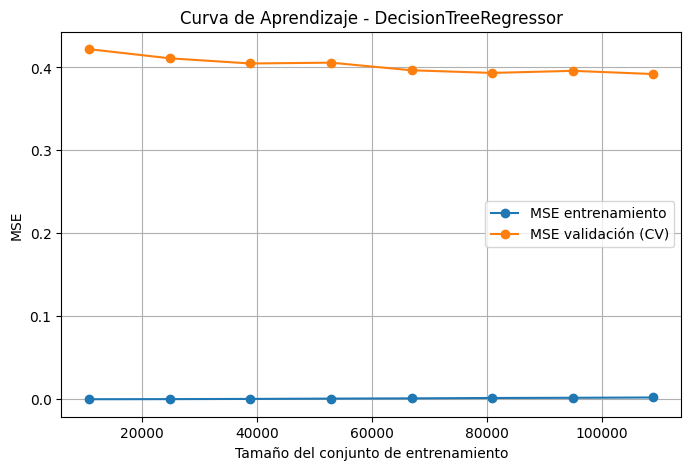

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    estimator=dt,
    X=X,
    y=y,
    cv=cv,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 8),
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

# Convertimos los errores negativos
train_mse = -train_scores.mean(axis=1)
val_mse = -val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mse, marker='o', label='MSE entrenamiento')
plt.plot(train_sizes, val_mse, marker='o', label='MSE validación (CV)')
plt.title("Curva de Aprendizaje - DecisionTreeRegressor")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()



### Conclusión general
La distancia entre ambas curvas evidencia que el modelo presenta **sobreajuste**:
- El error de entrenamiento es extremadamente bajo.
- El error de prueba, aunque relativamente bueno (coherente con un R² cercano a 0.93), es considerablemente mayor.

Esto sugiere que el árbol de decisión es demasiado complejo y podría beneficiarse de:
- Reducir la profundidad (`max_depth`)
- Ajustar hiperparámetros como `min_samples_leaf` o `max_leaf_nodes`
- Probar modelos más robustos

En resumen, la curva de aprendizaje muestra que el modelo tiene buen desempeño global, pero también un claro **sobreajuste**, lo cual es típico en árboles de decisión muy profundos.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Modelo KNN
knn = KNeighborsRegressor(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto'
)

# Validación cruzada 5-fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# MSE (scoring negativo → lo invertimos)
mse_scores_knn = -cross_val_score(
    knn,
    X,
    y,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# R²
r2_scores_knn = cross_val_score(
    knn,
    X,
    y,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

print(f"KNN - MSE promedio CV: {mse_scores_knn.mean():.4f}")
print(f"KNN - R2 promedio CV : {r2_scores_knn.mean():.4f}")


KNN - MSE promedio CV: 4.0179
KNN - R2 promedio CV : 0.3195


KNN tiene un Error Cuadratico Medio demasiado alto, esto es debido a que eliminamos varias columnas y los "vecinos" que quedan no son lo suficientemente semejantes para ir prediciendo de manera correcta. Por lo que el Features Importance solo servirá para el Decision Tree y Random Forest.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# MSE (negativo → lo invertimos)
mse_scores_rf = -cross_val_score(
    rf, X, y,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# R2
r2_scores_rf = cross_val_score(
    rf, X, y,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

print(f"Random Forest - MSE promedio CV: {mse_scores_rf.mean():.4f}")
print(f"Random Forest - R2 promedio CV : {r2_scores_rf.mean():.4f}")



Random Forest - MSE promedio CV: 0.2169
Random Forest - R2 promedio CV : 0.9633


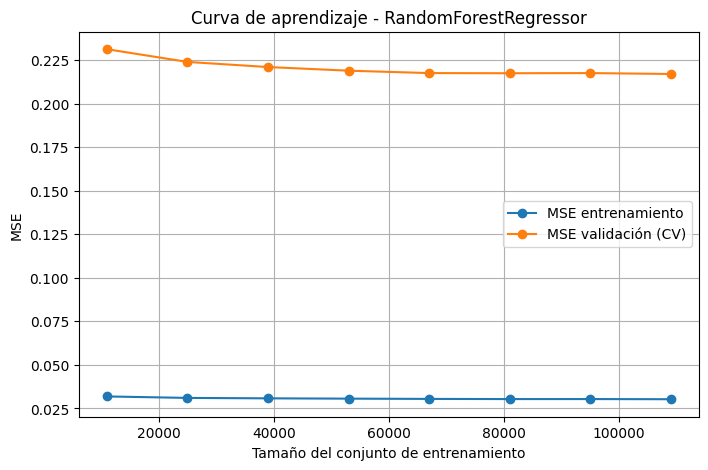

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    estimator=rf,
    X=X,
    y=y,
    cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring='neg_mean_squared_error',
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

train_mse = -train_scores.mean(axis=1)
val_mse = -val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mse, marker='o', label='MSE entrenamiento')
plt.plot(train_sizes, val_mse, marker='o', label='MSE validación (CV)')
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje - RandomForestRegressor")
plt.grid(True)
plt.legend()
plt.show()


#### Interpretación general
- El modelo presenta un **muy buen desempeño**, con valores de MSE de prueba significativamente más bajos que los observados en DecisionTreeRegressor
- Existe un pequeño **gap** entre el error de entrenamiento y el de prueba, consistente con un modelo de complejidad moderada pero bien regularizado.
- La forma de las curvas sugiere un equilibrio adecuado en el **trade-off baias–varianza**:  
  - **Bajo baias** (puede capturar relaciones complejas).  
  - **Baja varianza** (no se sobreajusta de manera inestable).
- El uso de un conjunto grande de árboles (100) mejora la estabilidad del modelo, lo que se refleja en curvas suaves y decrecientes.

En conjunto, la curva de aprendizaje indica que **RandomForestRegressor es el mejor modelo evaluado** en términos de precisión y capacidad de generalización para predecir el diámetro de los asteroides.
